In [1]:
import numpy as np
from numpy import genfromtxt
genfromtxt('16.csv', delimiter = ',', dtype = None)

array([[ 5.09094809e+00, -4.54467062e+00, -6.66525114e+00],
       [ 8.05511247e+00,  1.30252763e+00, -7.95043691e-01],
       [-5.79057163e+00,  7.83338931e+00,  6.39599688e+00],
       [ 5.20824969e+00, -4.43827274e+00, -3.59060376e+00],
       [-5.83666714e+00,  9.41099124e+00,  2.91681400e+00],
       [ 9.53245182e+00, -5.06996891e+00, -5.17323337e+00],
       [ 4.28013424e+00, -1.86939988e+00, -1.73510190e+00],
       [ 4.52734515e+00, -3.20014106e+00, -5.62029124e+00],
       [ 5.49643944e+00, -2.52711996e+00, -3.00825880e+00],
       [-1.34632190e+00,  1.05596552e+01,  2.46154740e+00],
       [-3.18672523e+00,  6.77104766e+00,  7.70326202e+00],
       [ 5.65946970e+00,  8.99135748e-02, -3.53670404e+00],
       [-7.53842677e+00,  1.07208283e+01,  4.93839129e+00],
       [ 1.54410308e+01, -7.25355700e-01, -2.20144887e+00],
       [ 3.88971829e+00, -7.54781870e+00, -3.20037907e+00],
       [ 3.70800318e+00, -7.20905800e+00, -4.57530762e+00],
       [-5.43305985e-01,  8.78965626e+00

In [2]:
import pandas as pd

df = pd.read_csv('16.csv')
df.head()

,5.090948085754696706e+00,-4.544670616747618297e+00,-6.665251144920661730e+00
0,8.055112,1.302528,-0.795044
1,-5.790572,7.833389,6.395997
2,5.208250,-4.438273,-3.590604
3,-5.836667,9.410991,2.916814
4,9.532452,-5.069969,-5.173233


First, let's start by scaling the values: the preprocessing module provides a function called `StandardScaler`

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

Next, we will estimate the number of clusters for k-means using the elbow method: silhouette methodTo use the elbow method, we calculate the sum of squared distances (SSD) for different numbers of clusters (k), and plot them in a line chart. The elbow point in the chart is the best choice for k.

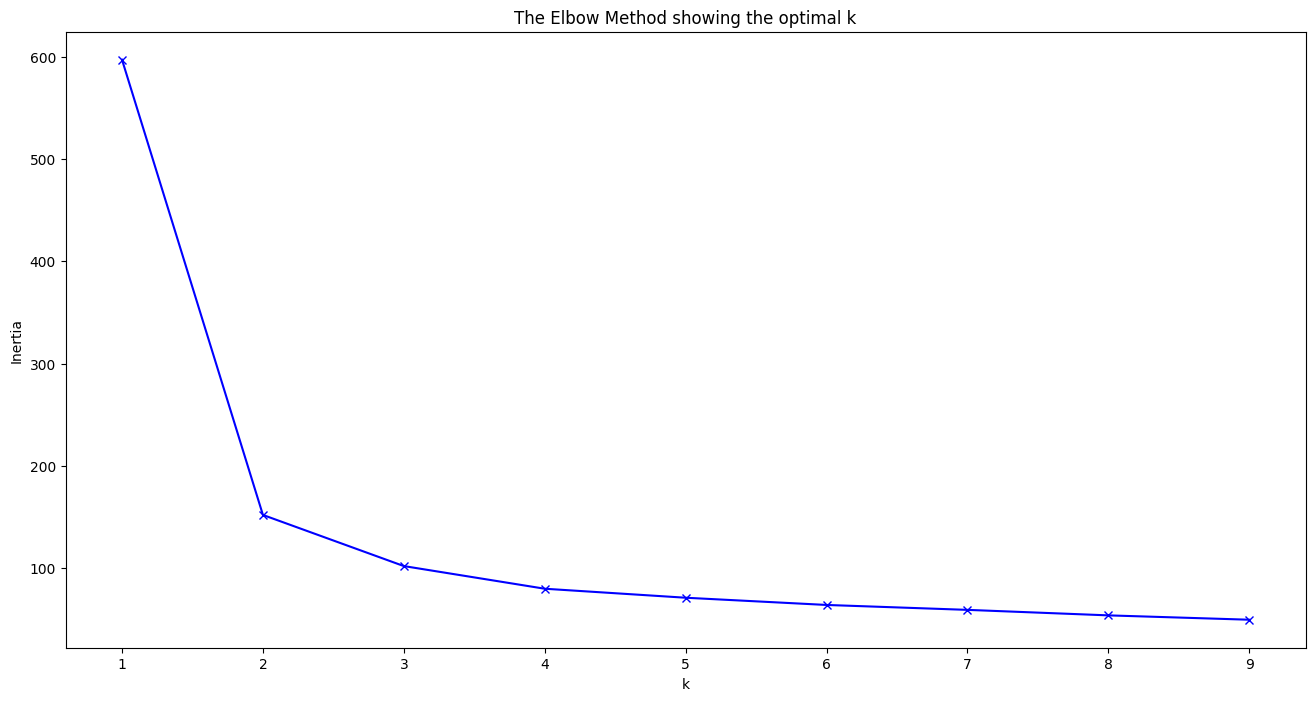

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

After determining the optimal number of clusters we use that in our modelFor hierarchical clustering, we can use a dendrogram

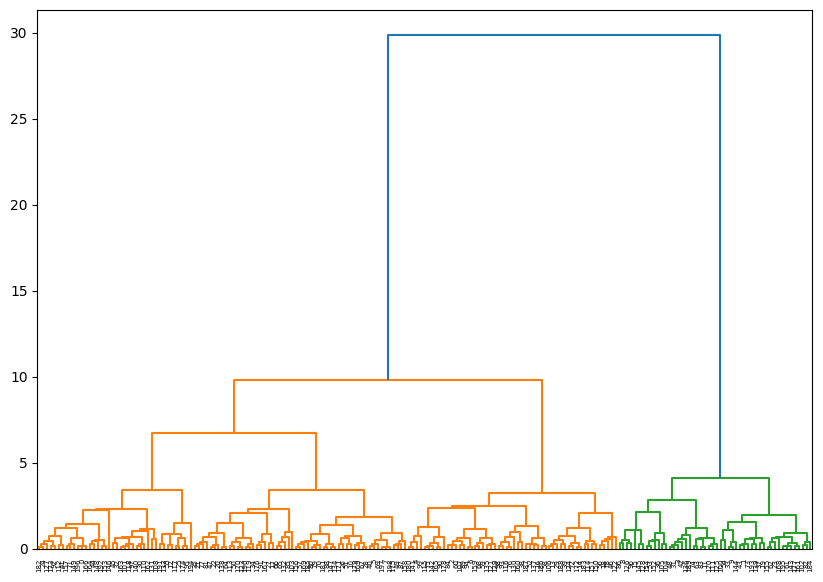

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df_scaled, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

For tuning the model using grid search, we choose a range for the hyperparameters and search for the best combination

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_clusters': [2, 3, 4, 5, 6, 7, 8]}

grid = GridSearchCV(KMeans(random_state=42), param_grid, cv=5)
grid.fit(df_scaled)

print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best parameters:  {'n_clusters': 8}
Best score:  -12.771831807912706


We then train our model using these parameters

In [8]:
kmeans = KMeans(n_clusters=grid.best_params_['n_clusters'], random_state=42)
kmeans.fit(df_scaled)

KMeans(random_state=42)

Finally, we can describe the clusters by creating a table with the average values for each feature in each cluster and creating boxplot diagrams for all features

In [9]:
df['cluster'] = kmeans.labels_

cluster_means = df.groupby(['cluster']).mean()
cluster_means

,5.090948085754696706e+00,-4.544670616747618297e+00,-6.665251144920661730e+00
cluster,,,
0,7.816737,-1.049312,-5.711936
1,-4.227079,9.793810,2.931634
2,6.276476,-0.967921,-2.737556
3,7.183322,-7.452968,-6.052740
4,4.963424,-7.229785,-3.733603
5,9.337865,-2.359670,0.484427
6,12.498828,0.047785,-1.891275
7,-5.364526,9.350428,6.445879


For the boxplots:

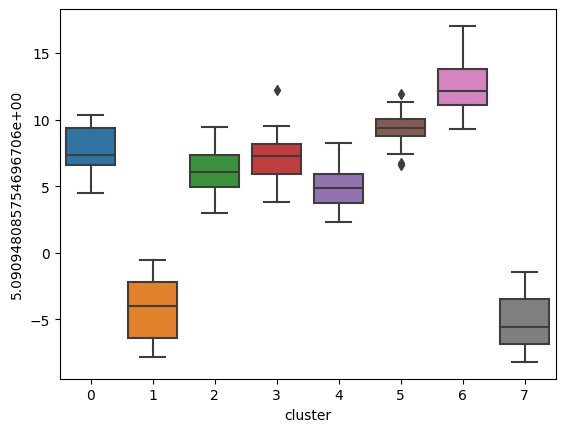

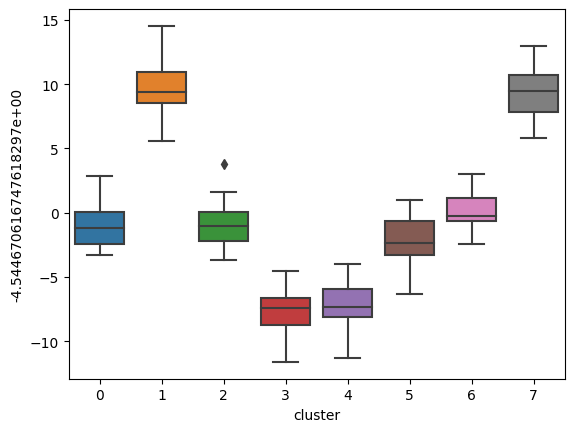

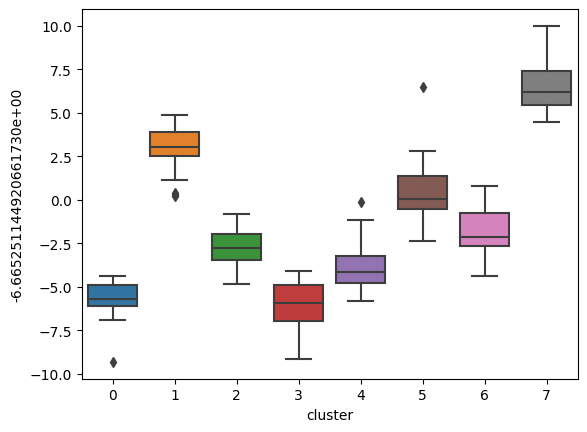

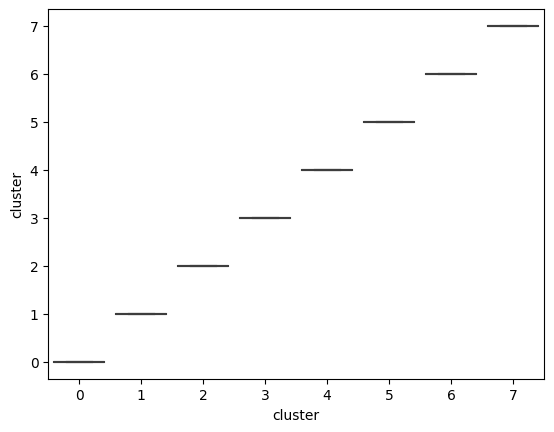

In [11]:
import seaborn as sns
    
# Repeat this for each column you want to create a boxplot for.
for column in df.columns:
    sns.boxplot(x="cluster", y=column, data=df)
    plt.show()


Remember to repeat the boxplot command for each column. Replace "column_name" with the respective name of the column.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2c241afa-1646-4314-aebf-23d9389451a1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>